**Библиотеки Python для DS (семинары в записи)**

Урок 1. Первичный и визуальный анализ данных

Исследование данных о качестве вина (Wine Quality Dataset), используйте данные по белым и красным винам:

**1. Проведите первичный анализ данных: изучите типы переменных, наличие пропусков, статистические характеристики.**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [9]:
import os
print(os.getcwd())


/content


In [17]:
import pandas as pd

# Загрузка данных
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

In [21]:
# Добавляем колонку с типом вина
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# Объединяем оба набора данных
df_wine = pd.concat([red_wine, white_wine], axis=0)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Этот фрейм данных содержит следующие столбцы:

Входные переменные (на основе физико-химических тестов):

1.fixed acidity (фиксированная кислотность)

2.volatile acidity (летучая кислотность)

3.citric acid (лимонная кислота)

4.residual sugar (остаточный сахар)

5.chlorides (хлориды)

6.free sulfur dioxide (свободный диоксид серы)

7.total sulfur dioxide (общий диоксид серы)

8.density (плотность)

9.рН

10.sulphates (сульфаты)

11.alcohol (спирт)

12.quality score between 0 and 10 (качество оценка от 0 до 10) — Выходная переменная (на основе сенсорных данных)

13.id (уникальный индефикатор вина)



In [47]:
# Первичный анализ данных
print("Общая информация о данных:")
df_wine.info()

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6463 non-null   object 
 2   citric acid           6497 non-null   float64
 3   residual sugar        6463 non-null   object 
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   object 
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6495 non-null   object 
 11  quality               6497 non-null   object 
 12  wine_type             6497 non-null   object 
dtypes: float64(7), object(6)
memory usage: 660.0+ KB


Из общей информации следует:

Всего 13 колонок

Нулевые значения отсуствуют

Нет пропущеных записей в колонках

Колонки 'quality' и 'id' имеют целоцисленные значения int64 остальные колонки имеют дробные значения float64

In [23]:
# Определим непрерывные признаки
continuous_features = ['fixed acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates']

# Определим признаки, которые будут преобразованы в объектный тип данных
# features_to_convert = [feature for feature in df_wine.columns if feature not in continuous_features]
features_to_convert = ['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'alcohol', 'quality']

# Определяем интервалы для категорий
bins = {
    'volatile acidity': [0.12, 0.39, 0.52, 0.64, 1.00, float('inf')],
    'residual sugar': [0.90, 1.90, 2.20, 2.60, 5.00, float('inf')],
    'free sulfur dioxide': [1, 7, 13, 21, 33, float('inf')],
    'alcohol': [8.40, 9.50, 10.20, 11.10, 12.00, float('inf')],
    'quality': [0.80, 3, 5, 6, 8, float('inf')]
}

# Определяем метки для категорий
labels = {
    'volatile acidity': ['0', '1', '2', '3', '4'],
    'residual sugar': ['0', '1', '2', '3', '4'],
    'free sulfur dioxide': ['0', '1', '2', '3', '4'],
    'alcohol': ['0', '1', '2', '3', '4'],
    'quality': ['0', '1', '2', '3', '4']
}

# Присваиваем категории
for feature in features_to_convert:
    if feature in bins:  # Проверяем, что признак есть в bins
        if len(bins[feature]) - 1 == len(labels[feature]):
            df_wine[feature] = pd.cut(df_wine[feature], bins[feature], labels=labels[feature], right=False)

# Преобразовываем признаки в объектный тип данных
for feature in features_to_convert:
    df_wine[features_to_convert] = df_wine[features_to_convert].astype('object')

In [24]:
# Проверяем тип данных после преобразования
df_wine.dtypes

,0
fixed acidity,float64
volatile acidity,object
citric acid,float64
residual sugar,object
chlorides,float64
free sulfur dioxide,object
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [25]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

fixed acidity (фиксированная кислотность):
Средняя фиксированая кислотность на уровне 7.00
Миниманая 3.80
Максимальная 15.90
Медиана равна 7.21
Отклонение состовляет 1.29

citric acid (лимонная кислота):
Средние значение лимонной кислоты на уровне 0.31
Миниманая 0.00
Максимальная 1.60
Медиана равна 0.31
Отклонение состовляет 0.14

chlorides (хлориды):
Средние значение хлоридов на уровне 0.47
Миниманая 0.01
Максимальная 0.61
Медиана равна 0.05
Отклонение состовляет 0.03

total sulfur dioxide (общий диоксид серы):
Средние значение общих диоксидов серы на уровне 118.00
Миниманая 6.00
Максимальная 440.00
Медиана равна 115.74
Отклонение состовляет 56.52

density (плотность):
Средние значение плотности на уровне 0.99
Миниманая 0.98
Максимальная 1.03
Медиана равна 0.99
Отклонение состовляет 0.00

рН (рН):
Средние значение рН на уровне 3.21
Миниманая 2.72
Максимальная 4.01
Медиана равна 3.21
Отклонение состовляет 0.16

sulphates (сульфаты):
Средние значение сульфатов на уровне 0.51
Миниманая 0.22
Максимальная 2.00
Медиана равна 0.53
Отклонение состовляет 0.14

In [26]:
df_wine.describe(include='object').T

,count,unique,top,freq
volatile acidity,6463,5,0,4648
residual sugar,6463,5,4,2616
free sulfur dioxide,6497,5,4,2706
alcohol,6495,5,2,1531
quality,6497,4,3,3915
wine_type,6497,2,white,4898


Пояснение полей:
unique: количество уникальных значений в столбце.

Для wine_type — всего 2 уникальных значения: red и white.
top: самое частое (модальное) значение в столбце.

Например, white встречается чаще, чем red.
freq: частота появления модального значения.

В данном случае, white встречается 4898 раз.

Выводы:
Данные категориальной переменной wine_type чистые (нет пропусков).
В наборе данных больше записей для белого вина (4898), чем для красного (1599).
Можно использовать переменную wine_type для сравнения характеристик между двумя типами вина.

**2. Визуализируйте распределение количественных переменных с помощью гистограмм и box plot.**

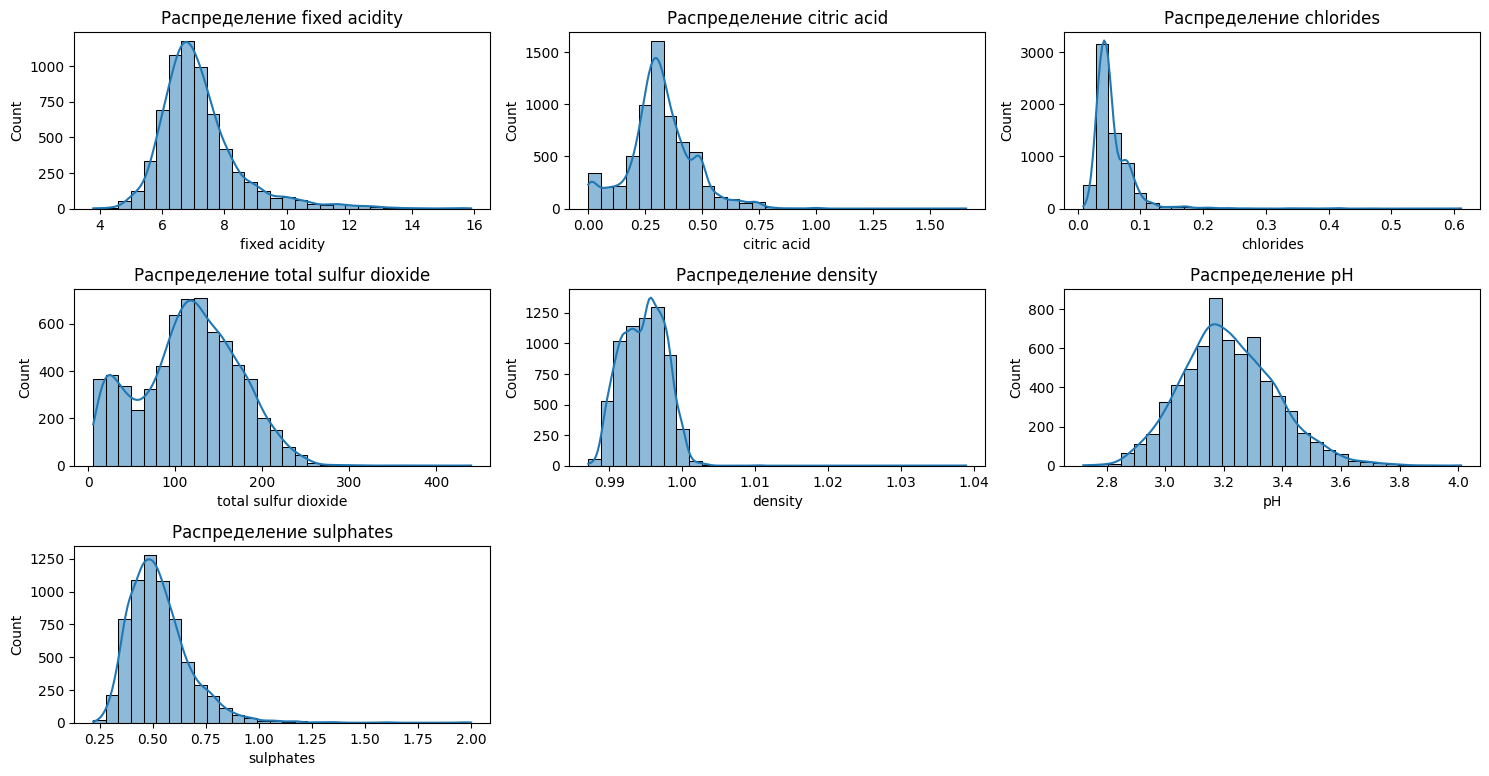

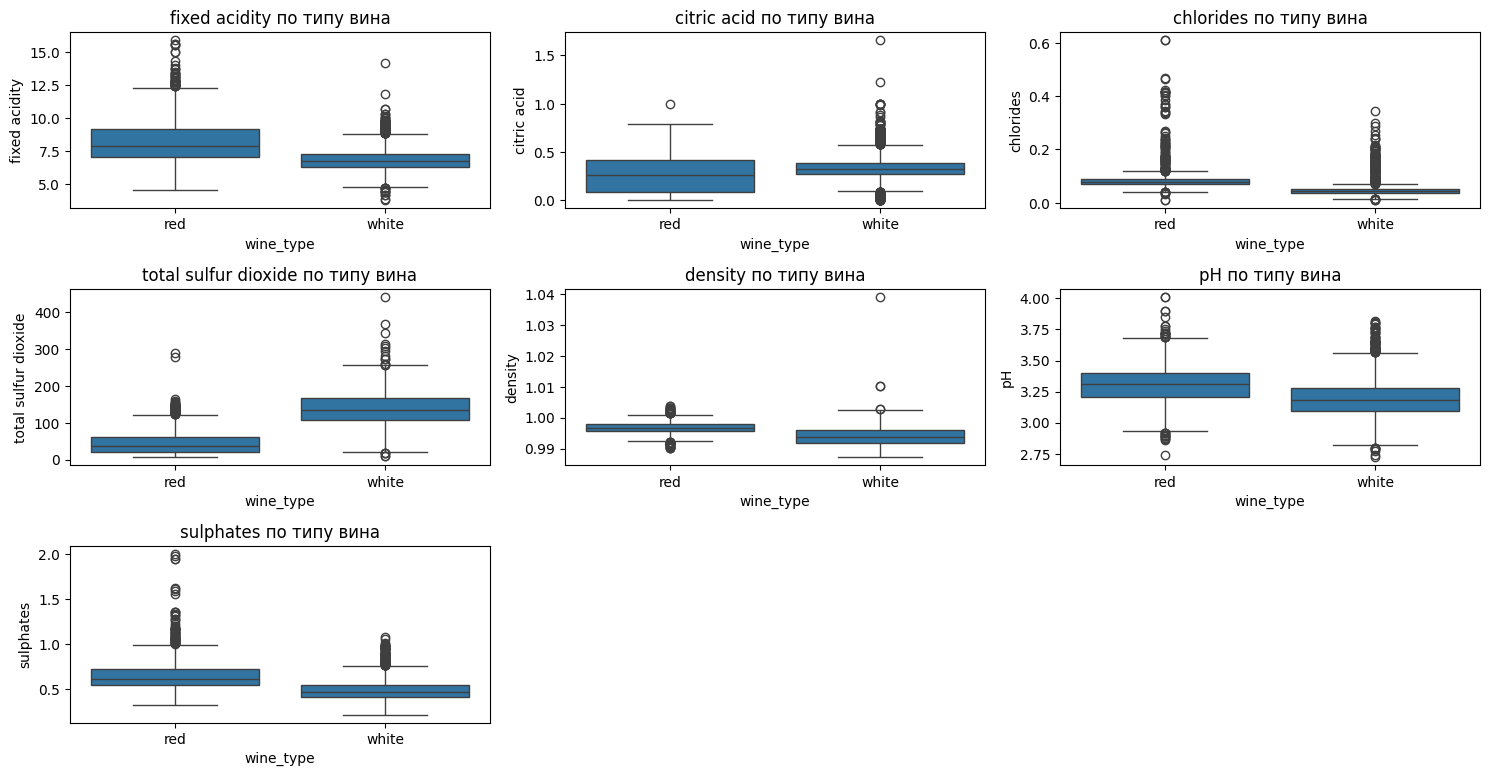

In [33]:
# Визуализация распределений количественных переменных
quantitative_columns = df_wine.select_dtypes(include=['float64', 'int64']).columns

# Гистограммы количественных переменных
plt.figure(figsize=(15, 10))
for i, column in enumerate(quantitative_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(wine_data[column], kde=True, bins=30)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

# Box plot для анализа переменных по типу вина
plt.figure(figsize=(15, 10))
for i, column in enumerate(quantitative_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=wine_data, x='wine_type', y=column)
    plt.title(f'{column} по типу вина')
plt.tight_layout()
plt.show()

**3. Постройте столбчатые диаграммы для анализа распределения категориальных переменных.**

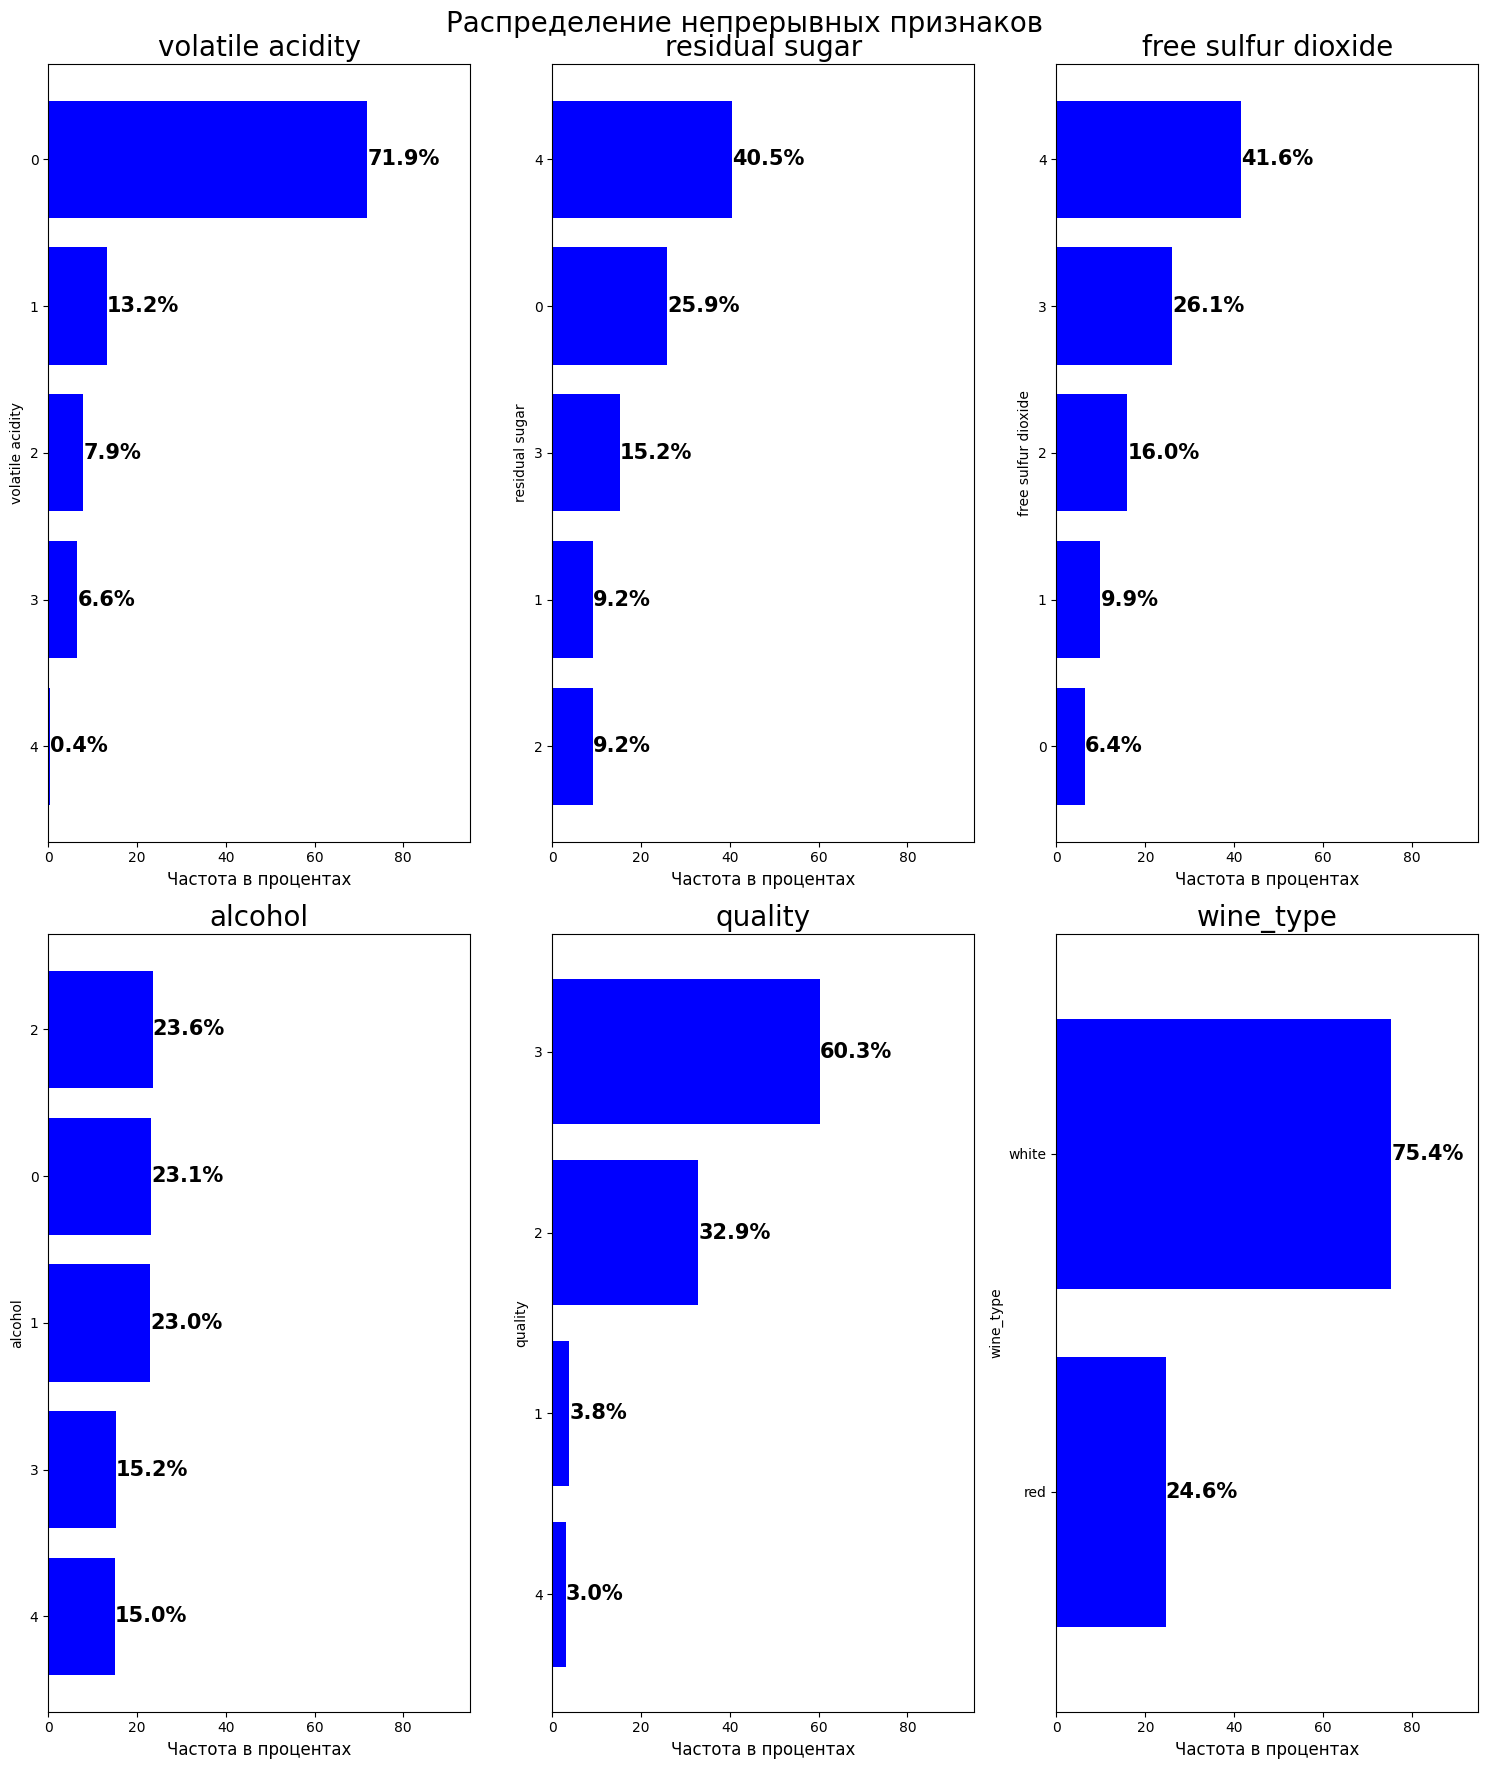

In [34]:
categorical_features = df_wine.columns.difference(continuous_features)

categorical_features = categorical_features[categorical_features != 'Id']

# Количество строк и столбцов для подграфиков
n_features = len(categorical_features)
ncols = 3
nrows = (n_features + ncols - 1) // ncols  # Округляем вверх

# Cоздает окно с графиками, разбитым на 2 строки и 3 столбца (12 графиков всего). Размер окна - 15 дюймов в ширину и 10 дюймов в высоту.
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 18))
# Плоская форма массива ax для удобства индексации
ax = axs.flatten()

# Сортировка категориальных признаков по порядку столбцов
categorical_features = sorted(categorical_features, key=lambda x: df_wine.columns.get_loc(x))

for i, col in enumerate(categorical_features):
    row = i // 3
    col_idx = i % 3

# Вычисление процентных значений частоты
    value_counts = df_wine[col].value_counts(normalize=True).mul(100).sort_values()

# Построение гистограммы
    value_counts.plot(kind='barh', ax=ax[row * ncols + col_idx], width=0.8, color='blue')

# Добавим процентные значения частоты к столбцам
    for index, value in enumerate(value_counts):
        ax[row * ncols + col_idx].text(value, index, f'{round(value, 1)}%', fontsize=15, weight='bold', va='center')

    ax[row * ncols + col_idx].set_xlim([0, 95])
    ax[row * ncols + col_idx].set_xlabel('Частота в процентах', fontsize=12)
    ax[row * ncols + col_idx].set_title(col.replace('_category', ''), fontsize=20)

# Отключение пустых подграфиков
for i in range(len(categorical_features), len(ax)):
    ax[i].axis('off')  # Отключаем оси для оставшихся подграфиков, если они не используются

plt.suptitle('Распределение непрерывных признаков', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

Двумерный анализ количественных признаков

In [40]:
# Проверка на дублирующиеся индексы
print(df_wine.index.duplicated().any())  # Должно вернуть False

# Сброс дублирующиеся индексов:
if df_wine.index.duplicated().any():
    df_wine = df_wine.reset_index(drop=True)


True


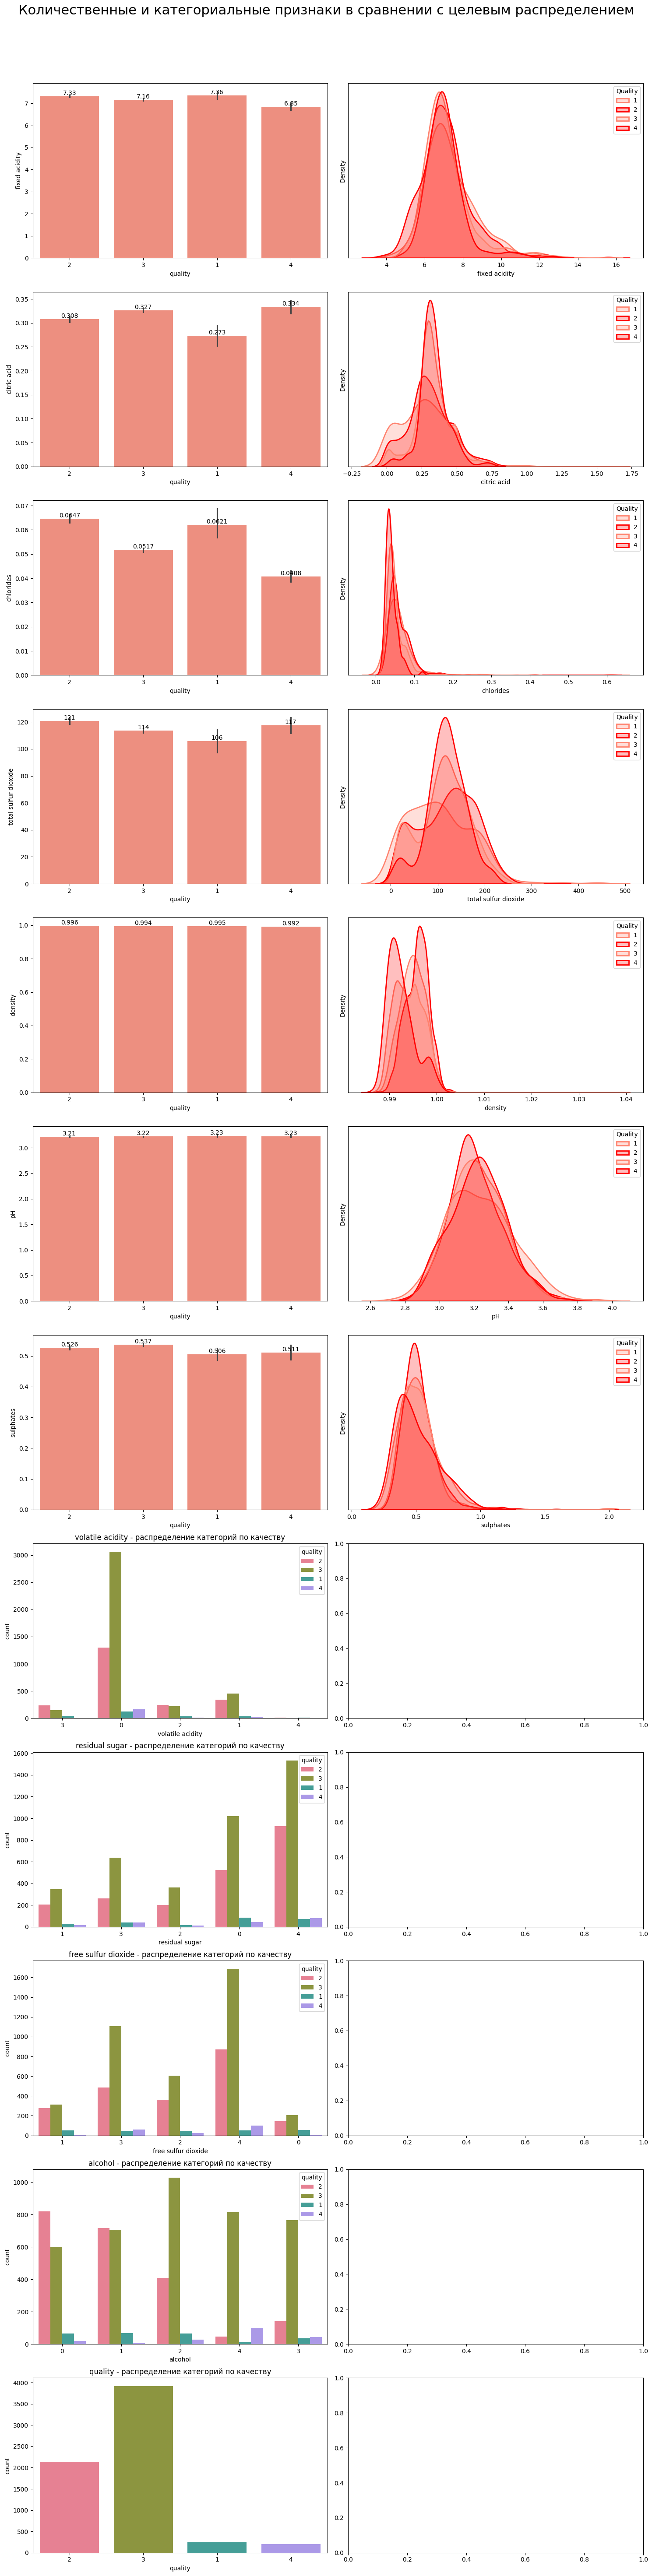

In [41]:
# Создаем фигуру и подложку для графиков
total_features = len(continuous_features) + len(categorical_features)
fig, ax = plt.subplots(total_features, 2, figsize=(15, 5 * total_features), gridspec_kw={'height_ratios': [1] * total_features})

# Преобразуем ax в одномерный массив для удобного обращения
ax = ax.reshape(-1, 2)

# Цикл для непрерывных признаков
for i, col in enumerate(continuous_features):
    # Гистограмма со средними значениями
    graph = sns.barplot(data=df_wine, x="quality", y=col, ax=ax[i, 0])

    # Добавление распределений KDE
    for quality in sorted(df_wine['quality'].unique()):
        sns.kdeplot(data=df_wine[df_wine["quality"] == quality], x=col, fill=True, linewidth=2, ax=ax[i, 1], label=quality)
    ax[i, 1].set_yticks([])
    ax[i, 1].legend(title='Quality', loc='upper right')

    # Добавление аннотаций на гистограмму
    for cont in graph.containers:
        graph.bar_label(cont, fmt='%.3g')

# Цикл для категориальных признаков
for i, col in enumerate(categorical_features):
    idx = len(continuous_features) + i  # Индекс для размещения категориальных графиков

    # Гистограмма с распределением категорий
    sns.countplot(data=df_wine, x=col, hue="quality", ax=ax[idx, 0])
    ax[idx, 0].set_title(f'{col} - распределение категорий по качеству')

# Устанавливаем заголовок для всей фигуры
plt.suptitle('Количественные и категориальные признаки в сравнении с целевым распределением', fontsize=22)

# Корректировка отступов
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Отображаем фигуру
plt.show()


**Двумерный анализ для категориальных признаков**

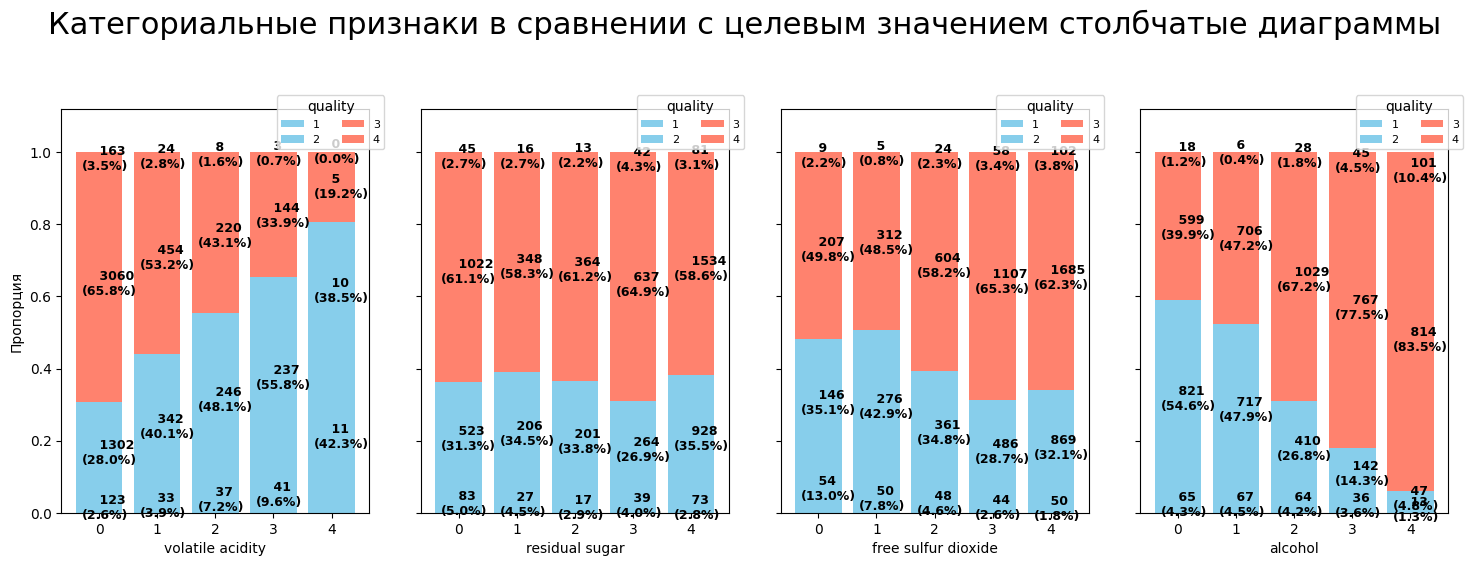

In [44]:
# Проверим размер списка категориальных признаков
categorical_features = [feature for feature in categorical_features if feature != 'quality']

nrows = 2
ncols = 4

# Если количество категориальных признаков меньше 8, то уменьшаем количество подграфиков
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,10))

# Вычисляем, сколько подграфиков нужно использовать
num_plots = len(categorical_features)

for i, col in enumerate(categorical_features):
# Создадим перекрестную таблицу для каждой категории объекта
    cross_tab = pd.crosstab(index=df_wine[col], columns=df_wine['quality'])

# Использование аргумента normalize=True дает нам соотношение данных по индексу
    cross_tab_prop = pd.crosstab(index=df_wine[col], columns=df_wine['quality'], normalize='index')

# Определение цветовой карты
    cmp = ListedColormap(['skyblue', '#ff826e'])

    # # Построение многослойных столбчатых диаграмм, находим позицию подграфика
    x, y = i // ncols, i % ncols
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
            legend=False, ylabel='Пропорция', sharey=True)

    # Добавим пропорции и количество отдельных бинов к нашему графику, добавление значений на график
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx - 0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                         s=f'    {count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=9, fontweight="bold")

    ax[x, y].legend(title='quality', loc=(0.7, 0.9), fontsize=8, ncol=2)
    ax[x, y].set_ylim([0, 1.12])
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)

# Удалим лишние пустые подграфики
for j in range(num_plots, nrows * ncols):
    fig.delaxes(ax.flatten()[j])

plt.suptitle('Категориальные признаки в сравнении с целевым значением столбчатые диаграммы', fontsize=22)
# Корректируем пространство для заголовка
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [51]:
df_wine.info(), df_wine.isnull().sum(), df_wine.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6463 non-null   object 
 2   citric acid           6497 non-null   float64
 3   residual sugar        6463 non-null   object 
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   object 
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6495 non-null   object 
 11  quality               6497 non-null   object 
 12  wine_type             6497 non-null   object 
dtypes: float64(7), object(6)
memory usage: 660.0+ KB


(None,
 fixed acidity            0
 volatile acidity        34
 citric acid              0
 residual sugar          34
 chlorides                0
 free sulfur dioxide      0
 total sulfur dioxide     0
 density                  0
 pH                       0
 sulphates                0
 alcohol                  2
 quality                  0
 wine_type                0
 dtype: int64,
        fixed acidity  citric acid    chlorides  total sulfur dioxide  \
 count    6497.000000  6497.000000  6497.000000           6497.000000   
 mean        7.215307     0.318633     0.056034            115.744574   
 std         1.296434     0.145318     0.035034             56.521855   
 min         3.800000     0.000000     0.009000              6.000000   
 25%         6.400000     0.250000     0.038000             77.000000   
 50%         7.000000     0.310000     0.047000            118.000000   
 75%         7.700000     0.390000     0.065000            156.000000   
 max        15.900000     1.66

**4. Сделайте выводы о качестве данных и потенциальных взаимосвязях.**

Данные не содержат дубликатов, пропущенных значений, что является положительным фактором для анализа.

Однако данные ограничены в информации такие как год сбора урожая винограда, год выпуска бутылки вина, страна производства вина.

Качество вина: Признак "quality" варьируется от 3 до 9, что говорит о том, что в наборе данных присутствуют как более низкокачественные, так и более качественные вина. Качество, вероятно, зависит от сочетания факторов, таких как кислотность, сахар, сульфаты и содержание алкоголя.

Плотность вина: Плотность вина в диапазоне от 0.9968 до 0.9980 указывает на то, что вина не сильно отличаются по этому показателю.

Алкоголь и качество: Видно, что вино с более высоким содержанием алкоголя (например, 10.3% или выше) имеет тенденцию к более высокому качеству (например, 6 или выше).

Свободный и общий диоксид серы: Более высокие уровни диоксида серы могут быть связаны с сохранностью вина и его качеством. Однако слишком высокие значения могут указывать на избыточное использование консервантов.

Кислотность и качество: Вина с более низкой летучей кислотностью (например, 0.28) могут быть лучше по качеству, чем вина с более высокой кислотностью, что может влиять на вкус.